In [207]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plot
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn import linear_model
from copy import deepcopy 
from __future__ import print_function

np.set_printoptions(precision=4,suppress=True)

In [208]:
def print(*args):
    __builtins__.print(*("%.4f" % a if isinstance(a, float) else a
                         for a in args))

In [209]:
X = np.loadtxt("X (1).txt")
y = np.loadtxt("Y_30.txt")
n = np.shape(y)[0]
m = np.shape(X)[1]
print(X)
print(y)
X0 = X[:,:-1]
print(X0)

[[252.36  96.67   8.37   1.  ]
 [262.54 100.07   9.07   1.  ]
 [285.7   96.78   9.35   1.  ]
 [277.52 101.3    9.67   1.  ]
 [307.95 100.35   9.45   1.  ]
 [322.44 104.8   10.12   1.  ]
 [334.88 106.17  10.35   1.  ]
 [350.11 109.2   11.03   1.  ]
 [346.1  104.48  10.38   1.  ]
 [374.91 106.88  12.15   1.  ]
 [378.49 113.14  12.98   1.  ]
 [397.48 112.38  11.34   1.  ]
 [378.39 109.07  10.95   1.  ]
 [393.44 114.45  12.89   1.  ]
 [403.84 115.23  13.71   1.  ]]
[138.7846 149.8022 160.5145 163.283  167.8987 178.9947 184.6245 190.2889
 188.0881 204.0496 215.3878 213.2689 205.3387 218.5924 227.6775]
[[252.36  96.67   8.37]
 [262.54 100.07   9.07]
 [285.7   96.78   9.35]
 [277.52 101.3    9.67]
 [307.95 100.35   9.45]
 [322.44 104.8   10.12]
 [334.88 106.17  10.35]
 [350.11 109.2   11.03]
 [346.1  104.48  10.38]
 [374.91 106.88  12.15]
 [378.49 113.14  12.98]
 [397.48 112.38  11.34]
 [378.39 109.07  10.95]
 [393.44 114.45  12.89]
 [403.84 115.23  13.71]]


In [210]:
np.shape(X)[0]

15

In [211]:
clf = linear_model.LinearRegression()
clf.fit(X0,y)
beta_sk = np.append(clf.coef_ ,clf.intercept_)
beta_sk

array([  0.3486,   0.404 ,   4.5925, -23.016 ])

In [212]:
beta = np.linalg.solve(X.T @ X, X.T @ y)
beta

array([  0.3486,   0.404 ,   4.5925, -23.016 ])

In [213]:
y_pred = X @ beta
e = y - y_pred
Q = e.T @ e
print(f"residuals: {y_pred - y}")
print(f"sum of squares of residuals: {Q}")

residuals: [ 3.6613  0.7806 -1.9016 -4.2259  0.3717 -0.7985 -0.4822  3.5093 -0.5796
  2.5998 -1.1496 -0.2499 -2.1024  0.973  -0.4059]
sum of squares of residuals: 62.823253646827744


In [214]:
s2 = Q / (n-m)
print(f"y variation estimate: {s2}") 

y variation estimate: 5.711204876984341


In [215]:
beta_cov = s2 * np.linalg.inv(X.T @ X)
beta_std = beta_cov.diagonal()**0.5
print(f"alpha covariance matrix estimate:\n{beta_cov}\n") 
print(f"alpha standard deviation estimate: {beta_std}")

alpha covariance matrix estimate:
[[  0.0014  -0.008   -0.0117   0.5058]
 [ -0.008    0.125   -0.2203  -8.1732]
 [ -0.0117  -0.2203   1.3101  13.1777]
 [  0.5058  -8.1732  13.1777 554.2771]]

alpha standard deviation estimate: [ 0.0373  0.3536  1.1446 23.5431]


In [216]:
beta_cor = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        beta_cor[i][j] = beta_cov[i][j] / (beta_std[i] * beta_std[j])
print(f"alpha correlation matrix estimate:\n {beta_cor}")

alpha correlation matrix estimate:
 [[ 1.     -0.6076 -0.2732  0.5753]
 [-0.6076  1.     -0.5444 -0.9819]
 [-0.2732 -0.5444  1.      0.489 ]
 [ 0.5753 -0.9819  0.489   1.    ]]


Text(0.5, 0, '$e_i$')

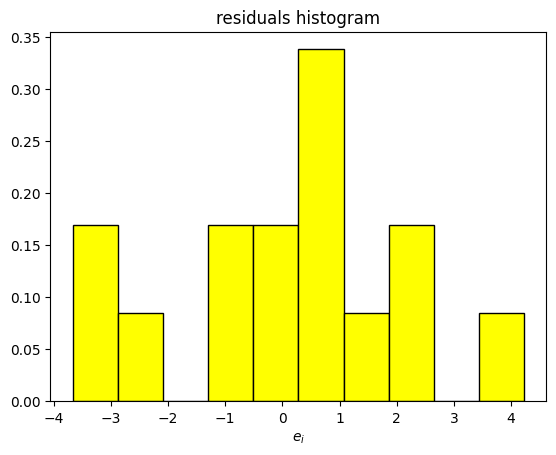

In [260]:
plot.hist(e,density=True,bins=10, color = 'yellow', edgecolor = 'black')
plot.title("residuals histogram")
plot.xlabel(r"$e_i$")

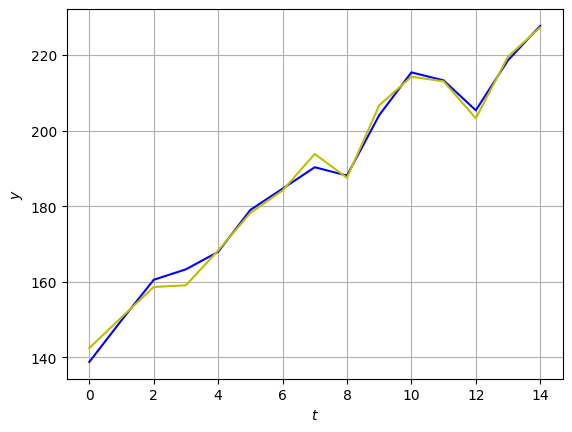

In [218]:
t = np.array([range(n)]).T
plot.plot(t,y,'b',t,y_pred, 'y')
plot.xlabel(r"$t$")
plot.ylabel(r"$y$")
plot.grid()

In [219]:
R2 = 1 - Q / np.sum((y-y.mean())**2)
R2_unbiased = 1 - (Q / (n - m)) / (np.sum((y-y.mean())**2) / (n - 1))
print(f"R2 coef:{R2}")
print(f"unbiased R2 coef:{R2_unbiased}")

R2 coef:0.9938375100521384
unbiased R2 coef:0.9921568309754488


Hypotheses for regressions

In [220]:
alpha = 0.05 # level of significance, 1-alpha is confidence level
gamma = 1 - alpha

In [221]:
stud_quant = stat.t.ppf((1 + gamma)/2, n - m)
print(f"individual confidence intervals w/ confidence level {gamma}")
for i, beta_i in enumerate(beta):
    lb = beta_i - beta_std[i]*stud_quant
    ub = beta_i + beta_std[i]*stud_quant
    print(f"i = {i}; [{lb},{ub}]; {beta_i}")

individual confidence intervals w/ confidence level 0.95
i = 0; [0.2663792180435868,0.4307919245193912]; 0.348585571281489
i = 1; [-0.3742210145929235,1.1821990447367636]; 0.40398901507192003
i = 2; [2.073274832175129,7.111737117615089]; 4.592505974895109
i = 3; [-74.8340141238285,28.801967849899775]; -23.016023136964357


In [222]:
alpha_joint = alpha
gamma_joint = 1 - alpha_joint
gamma = 1 - alpha_joint / m
stud_quant = stat.t.ppf((1 + gamma)/2, n - m)
print(f"joint confidence interval w/ confidence level {gamma_joint}")
for i, beta_i in enumerate(beta):
    lb = beta_i - beta_std[i]*stud_quant
    ub = beta_i + beta_std[i]*stud_quant
    print(f"i = {i}; [{lb},{ub}]; {beta_i}")

joint confidence interval w/ confidence level 0.95
i = 0; [0.2372505853461011,0.45992055721687686]; 0.348585571281489
i = 1; [-0.6499684869325093,1.4579465170763495]; 0.40398901507192003
i = 2; [1.180621700804695,8.004390248985523]; 4.592505974895109
i = 3; [-93.1949700247657,47.162923750836974]; -23.016023136964357


In [236]:
alpha = 0.05
gamma = 1 - alpha
print("p value for H0 = {beta_i = 0}")
for i, beta_i in enumerate(beta):
    stat_val = np.abs(beta_i)/beta_std[i]
    p_value = 1*(1 - stat.t.cdf(stat_val, n - m))
    print(f"i={i}; p_value: {p_value}")

p value for H0 = {beta_i = 0}
i=0; p_value: 7.335127814034337e-07
i=1; p_value: 0.13873467679398743
i=2; p_value: 0.0010213125861234795
i=3; p_value: 0.1746383269657632


array([  0.3486,   0.404 ,   0.    , -23.016 ])

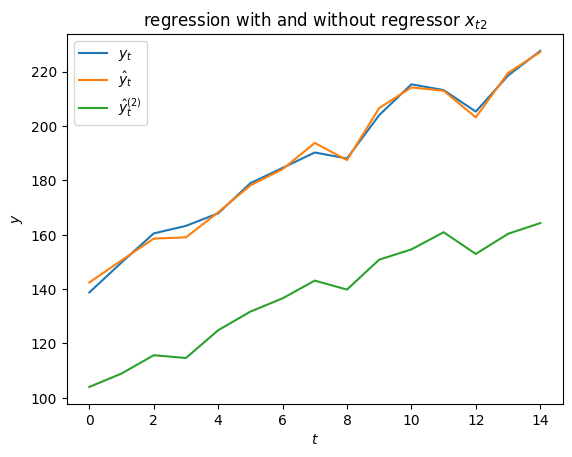

In [246]:
beta_mod = deepcopy(beta)
beta_mod[2] = 0
y_pred_mod = X @ beta_mod
t = np.array([range(n)]).T
plot.plot(t,y,t,y_pred,t,y_pred_mod)
plot.legend([r"$y_t$",r"$\hat{y}_t$", r"$\hat{y}_t^{(2)}$"])
plot.xlabel(r"$t$")
plot.ylabel(r"$y$")
plot.title(r"regression with and without regressor $x_{t2}$")
beta_mod

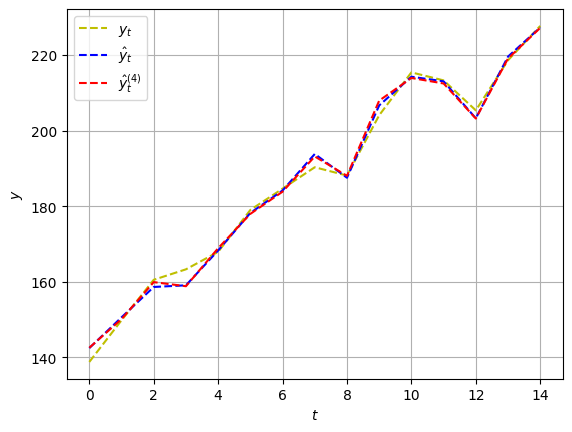

In [255]:
X3 = X[:,:3]
beta3 = np.linalg.solve(X3.T @ X3, X3.T @ y)
y_pred_mod3 = X3 @ beta3
t = np.array([range(n)]).T
plot.plot(t,y,'y--',t,y_pred,'b--',t,y_pred_mod3, 'r--')
plot.legend([r"$y_t$",r"$\hat{y}_t$", r"$\hat{y}_t^{(4)}$"])
plot.xlabel(r"$t$")
plot.ylabel(r"$y$")
beta3
plot.grid()

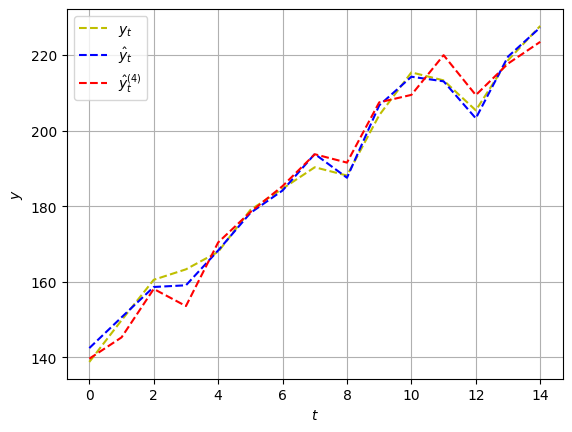

In [256]:
X1 = X[:,:1]
beta1 = np.linalg.solve(X1.T @ X1, X1.T @ y)
y_pred_mod1 = X1 @ beta1
t = np.array([range(n)]).T
plot.plot(t,y,'y--',t,y_pred,'b--',t,y_pred_mod1, 'r--')
plot.legend([r"$y_t$",r"$\hat{y}_t$", r"$\hat{y}_t^{(4)}$"])
plot.xlabel(r"$t$")
plot.ylabel(r"$y$")
beta_mod
plot.grid()

In [198]:
# hypothesis for beta_i=0, i != m
stat_val = R2/(1-R2) * (n-m)/(m-1)
p_value = 1 - stat.f.cdf(stat_val, m - 1, n - m)
print(p_value)

0.0000


0.1432
[  0.2672  -0.0409  13.6999 -39.7679]
[  0.3597   0.5396   3.8741 -33.7618]
1.0758 25.1739 62.8233


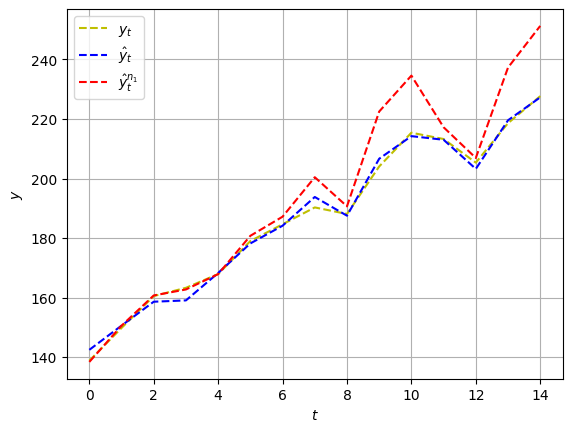

In [203]:
n1 = 5 # n1, n2 must be greater than m
n2 = n - n1
y1 = y[:n1]
y2 = y[n1:]
X1 = X[:n1,:]
X2 = X[n1:,:]

beta1 = np.linalg.solve(X1.T @ X1, X1.T @ y1)
beta2 = np.linalg.solve(X2.T @ X2, X2.T @ y2)
beta = np.linalg.solve(X.T @ X, X.T @ y)

Q_R = (y - X @ beta).T @ (y - X @ beta)
Q_1 = (y1 - X1 @ beta1).T @ (y1 - X1 @ beta1)
Q_2 = (y2 - X2 @ beta2).T @ (y2 - X2 @ beta2)
stat_val =( (Q_R - Q_1 - Q_2)/m) / ((Q_1 + Q_2)/(n1+n2-2*m))
p_value = 1 - stat.f.cdf(stat_val, m , n1 + n2 - 2*m)
print(p_value)
print(beta1)
print(beta2)
print(Q_1, Q_2, Q_R)

beta_mod = beta1
y_pred_mod = X @ beta_mod
t = np.array([range(n)]).T
plot.plot(t,y,'y--',t,y_pred,'b--',t,y_pred_mod,'r--')
plot.legend(["true","predicted", f"predicted with only {n1} entries"])

plot.legend([r"$y_t$",r"$\hat{y}_t$", r"$\hat{y}_t^{n_1}$"])
plot.xlabel(r"$t$")
plot.ylabel(r"$y$")
plot.grid()

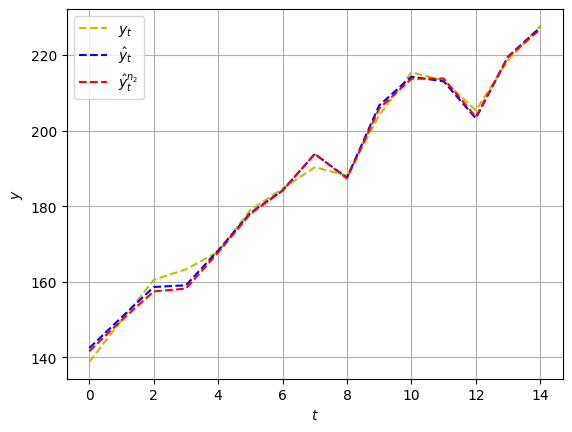

In [202]:
beta_mod = beta2
y_pred_mod = X @ beta_mod
t = np.array([range(n)]).T
plot.plot(t,y,'y--',t,y_pred,'b--',t,y_pred_mod,'r--')
plot.legend(["true","predicted", f"predicted with only {n1} entries"])

plot.legend([r"$y_t$",r"$\hat{y}_t$", r"$\hat{y}_t^{n_2}$"])
plot.xlabel(r"$t$")
plot.ylabel(r"$y$")
plot.grid()


In [204]:
y = np.loadtxt("Y_30.txt")
X = np.loadtxt("X (1).txt")

y = y[1:]
X = X[1:,:]

n = np.shape(y)[0]
m = np.shape(X)[1]

beta = np.linalg.solve(X.T @ X, X.T @ y)

y_pred = X[0,:] @ beta
print(y_pred)
print(f"residue: {(y[0] - y_pred)}")
print(f"relative residue: {(y[0] - y_pred)/y[0]} ")
150.2638

151.8647
residue: -2.0624265578933034
relative residue: -0.013767660752046806 


150.2638